In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

plt.style.use("ggplot")

### <center>Problem Set 2 - Quant Macro</center>

<center>Weimin Zhou</center>

<center>3, Oct, 2018</center>

## Question 1. Secular Behavior of the Labor Share

2. Construct the accounting LS for the corporate sector for the United States (1947-2017).

3. Redo the two previous items for your country of origin. If data are missing for your country, then do it for Japan and the UK.

Describe in detail what you do to construct each of your accounting LS and discuss your findings. What are the secular properties of the LS that you find in each of the items above?

In [6]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/zhouweimin/PycharmProjects/QuantEcon


In [24]:
import pandas as pd
# if download without operating anything, use: skiprows and skipcolumns options. 
US_data = pd.read_excel('US.xls',sep = ',',index_col=0)
US_data.index

Index(['        National income', 'Compensation of employees',
       '    Wages and salaries', '        Government', '        Other',
       '    Supplements to wages and salaries',
       '        Employer contributions for employee pension and insurance funds1',
       '        Employer contributions for government social insurance',
       'Proprietors' income with IVA and CCAdj', '    Farm', '    Nonfarm',
       'Rental income of persons with CCAdj',
       'Corporate profits with IVA and CCAdj', '    Taxes on corporate income',
       '    Profits after tax with IVA and CCAdj', '        Net dividends',
       '        Undistributed profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports', 'Less: Subsidies2',
       'Business current transfer payments (net)', '    To persons (net)',
       '    To government (net)', '    To the rest of the world (net)',
       'Current surplus of government enterprises2',
       'Adde

## 1. Construct the nationwide accounting LS for the United States (1947-2017)

## Labor Share

By downloading Table 1.12: National Income by Type of Income from year 1947 to 2017. 

We first distinguish which is sourcing from labor and capital, specifically: wage times effective working hours are the labor part, indexed as $w*H$ and rental rates times capital stock are the capital part of contribution, indexed as $r*K$. 

As discussed during class, there's one sector named 'Proprietors' income with IVA and CCAdj' (PI hereafter) is regarded as self-employed sector, which needs split labor and capital.  
 

1. To compute Total Income, sum up all of which:

### Labor: 
- 'Compensation of employees' 

### Need to separate: 
- 'Proprietors' income with IVA and CCAdj'

### Capital: 
- 'Rental income of persons with CCAdj'

- 'Corporate profits with IVA and CCAdj'

- 'Net interest and miscellaneous payments'

- 'Taxes on production and imports'


To separate PI, we use the following strategy:

- compute $\frac{wH}{Y-PI}=\theta$ where $\theta$ is the wage of PI

- then: $(rK)_{PI} = (1-\theta)PI$ as capital part, and $(wH)_{PI}=\theta PI$

To exclude PI, compute Naive Labor Share by:
$$ \frac{CE}{Y}$$

In [29]:
US_data = US_data.transpose()
US_data= US_data[['Compensation of employees', 'Proprietors\' income with IVA and CCAdj','Rental income of persons with CCAdj', 'Corporate profits with IVA and CCAdj','Net interest and miscellaneous payments','Taxes on production and imports']]
US_data.columns

Index(['Compensation of employees', 'Proprietors' income with IVA and CCAdj',
       'Rental income of persons with CCAdj',
       'Corporate profits with IVA and CCAdj',
       'Net interest and miscellaneous payments',
       'Taxes on production and imports'],
      dtype='object')

In [43]:
CE   = US_data[['Compensation of employees']] 
PI   = US_data[['Proprietors\' income with IVA and CCAdj']]
RI   = US_data[['Rental income of persons with CCAdj']]
CP   = US_data[['Corporate profits with IVA and CCAdj']]
NIMP = US_data[['Net interest and miscellaneous payments']]
TPI  = US_data[['Taxes on production and imports']]

CE = np.asarray(CE, float)
PI = np.asarray(PI, float)
RI = np.asarray(RI, float)
CP = np.asarray(CP, float)
NIMP = np.asarray(NIMP, float)
TPI = np.asarray(TPI, float)

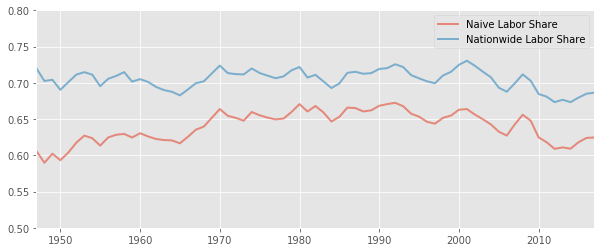

In [73]:
# Naive Labor Share:
Y = CE + PI + RI + CP + NIMP + TPI
LS_naive = CE/ Y  # LS for the corporate sector

# Nationwide Labor Share
theta = CE / (Y - PI)
RK_PI = (1-theta)*PI
LS_national = ( CE + theta*PI ) / Y

Year = np.linspace(1947,2017,num=71)
Year = np.asarray(Year)
np.shape(Year)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.5,0.8)
plt.xlim(1947,2017)
ax.plot(Year, LS_naive, linewidth=2, alpha=0.6, label='Naive Labor Share')
ax.plot(Year, LS_national, linewidth=2, alpha=0.6, label='Nationwide Labor Share')
ax.legend()
plt.show()


Since Chinese Data on National Income is only provincial available, which is more time-consuming to collect.

I use United Kindom Data, sourced from [Office for National Statistics (GB)](https://www.ons.gov.uk/economy/nationalaccounts/uksectoraccounts/datasets/unitedkingdomeconomicaccountsmainaggregates) instead.


In [92]:
UK_data = pd.read_excel('UK.xls',sep = ',',index_col=0,sheetname='Sheet1')
# UK_data = UK_data.transpose()
UK_data.index

Index(['Compensation of employees', 'Gross operating surplus of corporations',
       'Other income ', 'Gross value added at factor cost',
       'Taxes on production less subsidies',
       'Statistical discrepancy (income)',
       'Gross domestic product at market prices'],
      dtype='object')

In [105]:
import pandas as pd
# if download without operating anything, use: skiprows and skipcolumns options. 
UK_data = pd.read_excel('UK.xls',sep = ',',index_col=0,sheetname='Sheet1')
UK_data.index

Index(['Compensation of employees', 'Gross operating surplus of corporations',
       'Other income', 'Gross value added at factor cost',
       'Taxes on production less subsidies',
       'Statistical discrepancy (income)',
       'Gross domestic product at market prices'],
      dtype='object')

In [110]:
UK_data = UK_data.transpose()
CE = UK_data[['Compensation of employees']]
GOSC = UK_data[['Gross operating surplus of corporations']]
OI = UK_data[['Other income']]
GVA = UK_data[['Gross value added at factor cost']]
TPL = UK_data[['Taxes on production less subsidies']]

CE = np.asarray(CE, float)
GOSC = np.asarray(GOSC, float)
OI = np.asarray(OI, float)
GVA = np.asarray(GVA, float)
TPL = np.asarray(TPL, float)

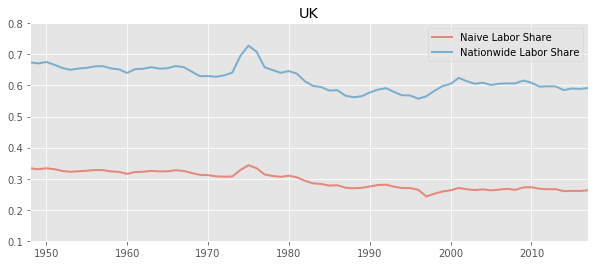

In [122]:
# Naive Labor Share:
OI = np.nan_to_num(OI)
PI = OI + GVA 
Y = CE + GOSC + PI + TPL
LS_naive = CE / Y  # LS for the corporate sector

# Nationwide Labor Share
theta = CE / (Y - PI)
RK_PI = (1-theta)*PI
LS_national = ( CE + theta*PI ) / Y

Year = np.linspace(1948,2017,num=70)
Year = np.asarray(Year)
np.shape(Year)
fig, ax = plt.subplots(figsize=(10,4))
plt.ylim(0.1,0.8)
plt.xlim(1948,2017)
ax.plot(Year, LS_naive, linewidth=2, alpha=0.6, label='Naive Labor Share')
ax.plot(Year, LS_national, linewidth=2, alpha=0.6, label='Nationwide Labor Share')
plt.title('UK')
ax.legend()
plt.show()